In [1]:
import os, shutil

original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [3]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 73, 73, 64)        8256      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 35, 35, 128)       32896     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 128)     

In [5]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

C:\Users\lsh92\AppData\Local\Temp/ipykernel_11072/775559235.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 33s 314ms/step - loss: 0.6926 - acc: 0.5025 - val_loss: 0.6860 - val_acc: 0.5540
Epoch 2/30
100/100 [==============================] - 30s 297ms/step - loss: 0.6784 - acc: 0.5785 - val_loss: 0.6733 - val_acc: 0.5490
Epoch 3/30
100/100 [==============================] - 31s 314ms/step - loss: 0.6586 - acc: 0.6160 - val_loss: 0.6523 - val_acc: 0.6330
Epoch 4/30
100/100 [==============================] - 32s 317ms/step - loss: 0.6414 - acc: 0.6185 - val_loss: 0.6370 - val_acc: 0.6520
Epoch 5/30
100/100 [==============================] - 31s 308ms/step - loss: 0.6196 - acc: 0.6630 - val_loss: 0.6280 - val_acc: 0.6550
Epoch 6/30
100/100 [==============================] - 31s 306ms/step - loss: 0.6110 - acc: 0.6660 - val_loss: 0.6105 - val_acc: 0.6570
Epoch 7/30
100/100 [==============================] - 30s 302ms/step - loss: 0.5944 - acc: 0.6795 - val_loss: 0.6074 - val_acc: 0.6730
Epoch 8/30
100/100 [==============================] - 3

In [8]:
model.save('cats_and_dogs_small_1.h5')

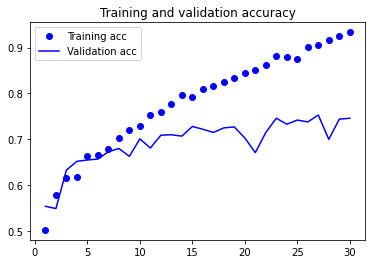

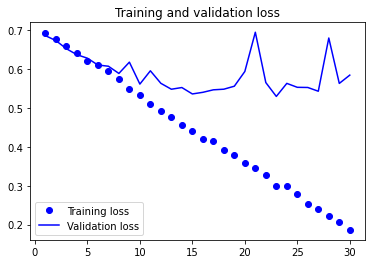

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()